In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model=SentenceTransformer('all-MiniLM-L6-v2')


with open(r"C:\Users\ankad\Documents\Project1\clean_solar_data.txt", "r") as f:
    sentences = f.readlines()
sentences =[s.strip() for s in sentences]

embeddings=model.encode(sentences)

query="Number of moons"

enquery=model.encode(query)
enquery = enquery.reshape(1, -1)
scores=cosine_similarity(enquery,embeddings)[0]
results = list(zip(sentences, scores))
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)


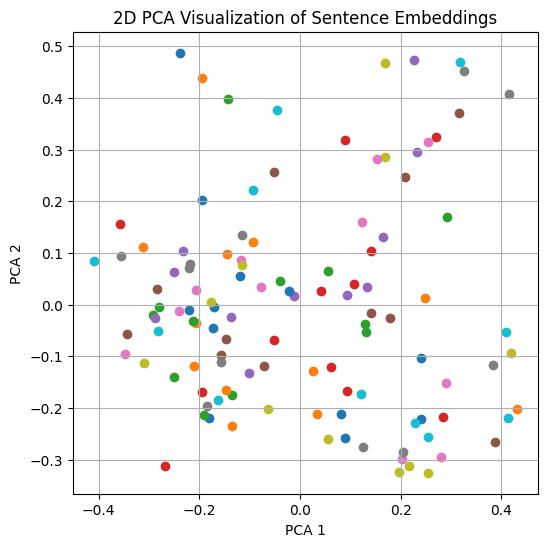

In [6]:
pca=PCA(n_components=2)
embeddings_2d=pca.fit_transform(embeddings)

plt.figure(figsize=(6,6))
for i, sentence in enumerate(sentences):
    x, y = embeddings_2d[i]
    plt.scatter(x, y)
    #plt.text(x+0.01, y+0.01, sentence, fontsize=9)
plt.title("2D PCA Visualization of Sentence Embeddings")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()